In [17]:

import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random

In [18]:
  

X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [19]:

df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-3.856548,-2.372711,-0.192145,0.676797,-0.196745,1
1,-0.289914,-0.882359,-1.853596,-0.867287,-1.051452,1
2,1.041755,1.342215,-1.779668,-4.396316,0.683409,1
3,0.637582,1.189572,-1.030586,-1.301656,-1.217055,1
4,-0.686861,1.441354,-2.414686,1.431956,-1.797242,0


In [20]:

# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)


In [21]:

# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df
     

In [22]:

# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)
     

In [23]:

df1 = combined_sampling(df,0.5,0.5)
     

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11096\1527580876.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [24]:

df2 = combined_sampling(df,0.5,0.5)
     

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11096\1527580876.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [25]:
df3 = combined_sampling(df,0.5,0.5)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11096\1527580876.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [26]:

from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [27]:

clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [28]:

from sklearn.tree import plot_tree

[Text(0.5, 0.9285714285714286, 'X[1] <= -0.608\ngini = 0.499\nsamples = 50\nvalue = [24, 26]'),
 Text(0.4230769230769231, 0.7857142857142857, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(0.5769230769230769, 0.7857142857142857, 'X[0] <= 0.019\ngini = 0.397\nsamples = 33\nvalue = [24, 9]'),
 Text(0.38461538461538464, 0.6428571428571429, 'X[1] <= 0.357\ngini = 0.211\nsamples = 25\nvalue = [22, 3]'),
 Text(0.23076923076923078, 0.5, 'X[1] <= 0.182\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.15384615384615385, 0.35714285714285715, 'X[0] <= -0.331\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.07692307692307693, 0.21428571428571427, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.23076923076923078, 0.21428571428571427, 'X[1] <= -0.531\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.15384615384615385, 0.07142857142857142, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3076923076923077, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(

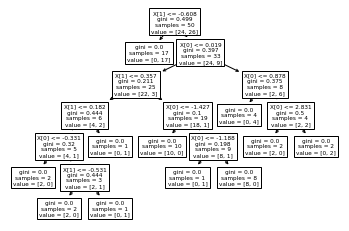

In [29]:

plot_tree(clf1)
     
    

[Text(0.5, 0.9, 'X[1] <= 0.03\ngini = 0.499\nsamples = 50\nvalue = [24, 26]'),
 Text(0.2, 0.7, 'X[0] <= 0.767\ngini = 0.08\nsamples = 24\nvalue = [1, 23]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 22\nvalue = [0, 22]'),
 Text(0.3, 0.5, 'X[0] <= 1.345\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.7, 'X[0] <= 2.938\ngini = 0.204\nsamples = 26\nvalue = [23, 3]'),
 Text(0.7, 0.5, 'X[0] <= -1.168\ngini = 0.08\nsamples = 24\nvalue = [23, 1]'),
 Text(0.6, 0.3, 'X[0] <= -1.427\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.3, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(0.9, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

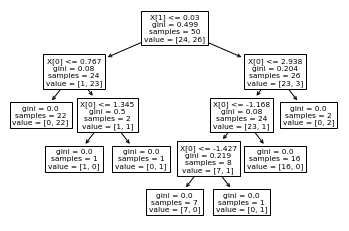

In [30]:
plot_tree(clf2)


[Text(0.39285714285714285, 0.9166666666666666, 'X[0] <= 0.57\ngini = 0.493\nsamples = 50\nvalue = [28, 22]'),
 Text(0.14285714285714285, 0.75, 'X[1] <= -3.101\ngini = 0.33\nsamples = 24\nvalue = [5, 19]'),
 Text(0.07142857142857142, 0.5833333333333334, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.21428571428571427, 0.5833333333333334, 'X[0] <= -1.235\ngini = 0.236\nsamples = 22\nvalue = [3, 19]'),
 Text(0.14285714285714285, 0.4166666666666667, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.2857142857142857, 0.4166666666666667, 'X[0] <= -0.003\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.21428571428571427, 0.25, 'X[1] <= -0.46\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.14285714285714285, 0.08333333333333333, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.2857142857142857, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.35714285714285715, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.6428571428571429, 0.75, 'X[1] 

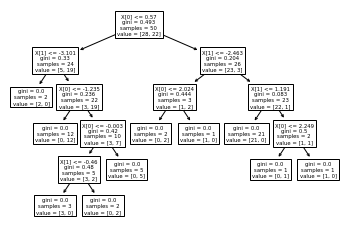

In [31]:

plot_tree(clf3)

In [32]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [33]:

clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [34]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])